In [2]:
# Loading libraries
import seaborn as sns
import pandas as pd
import csv
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

csv_path = "/content/final_training_data.csv"
df = pd.read_csv(csv_path)

print("Şekil:", df.shape)
df.head(3)


Şekil: (481411, 25)


,timestamp,vehicle_id,speed_kmh,lat,lon,z,acceleration,mass_kg,soc_pc,energy_consumption,...,device.battery.capacity,frontSurfaceArea,recuperationEfficiency,maximumPower,device.battery.maximumChargeRate,rollDragCoefficient,rotatingMass,radialDragCoefficient,dist_m,slope_pct
0,2,veh1,0.000,39.751093,30.502114,825.839847,0.00,1916.0,91.741386,0.00,...,93684.0,2.45,0.93,187368.0,138421.0,0.01,38.0,0.445,NaN,NaN
1,3,veh1,13.824,39.751061,30.502096,825.898326,3.84,1916.0,91.736124,4.93,...,93684.0,2.45,0.93,187368.0,138421.0,0.01,38.0,0.445,3.842938,1.521728
2,4,veh1,27.648,39.750998,30.502060,826.015284,3.84,1916.0,91.721126,14.04,...,93684.0,2.45,0.93,187368.0,138421.0,0.01,38.0,0.445,7.685875,1.521728


In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numeric, and categorical but cardinal variables in the dataset.
    Note: Numeric-looking categorical variables are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for numeric but categorical variables
        car_th: int, optinal
                Class threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numeric variables
        cat_but_car: list
                List of categorical-looking cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is within cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables:
        cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat


cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df) # Let's use the 'grab_col_names' function to examine the categories of our variables and classify them.
print("cat cols: ", cat_cols)
print("num_cols: ", num_cols)
print("cat_but_car: ", cat_but_car)
print("num_but_cat" ,num_but_cat)


Observations: 481411
Variables: 25
cat_cols: 1
num_cols: 23
cat_but_car: 1
num_but_cat: 1
cat cols:  ['rollDragCoefficient']
num_cols:  ['timestamp', 'speed_kmh', 'lat', 'lon', 'z', 'acceleration', 'mass_kg', 'soc_pc', 'energy_consumption', 'accel', 'decel', 'propulsionEfficiency', 'airDragCoefficient', 'constantPowerIntake', 'device.battery.capacity', 'frontSurfaceArea', 'recuperationEfficiency', 'maximumPower', 'device.battery.maximumChargeRate', 'rotatingMass', 'radialDragCoefficient', 'dist_m', 'slope_pct']
cat_but_car:  ['vehicle_id']
num_but_cat ['rollDragCoefficient']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481411 entries, 0 to 481410
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   timestamp                         481411 non-null  int64  
 1   vehicle_id                        481411 non-null  object 
 2   speed_kmh                         481411 non-null  float64
 3   lat                               481411 non-null  float64
 4   lon                               481411 non-null  float64
 5   z                                 481411 non-null  float64
 6   acceleration                      481411 non-null  float64
 7   mass_kg                           481411 non-null  float64
 8   soc_pc                            481411 non-null  float64
 9   energy_consumption                481411 non-null  float64
 10  accel                             481411 non-null  float64
 11  decel                             481411 non-null  f

EKSİK DEĞER ANALİZİ

In [6]:
df.isnull().sum()

,0
timestamp,0
vehicle_id,0
speed_kmh,0
lat,0
lon,0
z,0
acceleration,0
mass_kg,0
soc_pc,0
energy_consumption,0


SÜTUN BAZINDA 0 SAYILARI

In [7]:
zero_counts_per_col = (df == 0).sum()
print(zero_counts_per_col)


timestamp                                0
vehicle_id                               0
speed_kmh                           119647
lat                                      0
lon                                      0
z                                        0
acceleration                        237802
mass_kg                                  0
soc_pc                                   0
energy_consumption                     538
accel                                    0
decel                                    0
propulsionEfficiency                     0
airDragCoefficient                       0
constantPowerIntake                      0
device.battery.capacity                  0
frontSurfaceArea                         0
recuperationEfficiency                   0
maximumPower                             0
device.battery.maximumChargeRate         0
rollDragCoefficient                      0
rotatingMass                             0
radialDragCoefficient                    0
dist_m     

AYKIRI DEĞER ANALİZİ

In [8]:
# --- Aykırı Değer Analizi (IQR yöntemi) ---

# grab_col_names fonksiyonu zaten çalıştı ve num_cols elimizde
# Not: target_Wh_per_km hedef değişken olduğu için analiz dışı bırakılıyor

num_cols_for_outlier = [col for col in num_cols if col != "target_Wh_per_km"]

def detect_outliers_iqr(data, col):
    """
    IQR (Interquartile Range) yöntemine göre verilen değişkendeki aykırı değerleri bulur.
    """
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers[[col]]

# Aykırı değer sayısı, oranı ve istatistikleri özetleyen sözlük
outlier_summary = {}

for col in num_cols_for_outlier:
    outliers = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    total = df[col].notna().sum()
    ratio = 100 * outlier_count / total
    outlier_summary[col] = {
        "adet": outlier_count,
        "oran(%)": round(ratio, 2),
        "min": df[col].min(),
        "max": df[col].max(),
        "Q1": df[col].quantile(0.25),
        "Q3": df[col].quantile(0.75)
    }

# Sonuçları DataFrame'e çevirip oran sırasına göre sırala
outlier_df = pd.DataFrame(outlier_summary).T.sort_values("oran(%)", ascending=False)

print("\nAykırı Değer Özeti (yüksekten düşüğe):")
display(outlier_df)



Aykırı Değer Özeti (yüksekten düşüğe):


,adet,oran(%),min,max,Q1,Q3
acceleration,183927.0,38.21,-6.000500,4.000000,0.000000,0.774997
energy_consumption,104659.0,21.74,-138.660000,140.520000,-1.085000,5.570000
slope_pct,27090.0,7.49,-247.973497,220.813979,-3.500542,3.435222
z,12011.0,2.49,797.142074,906.536074,826.003749,841.886491
lon,5641.0,1.17,30.492570,30.524629,30.504826,30.511116
soc_pc,3227.0,0.67,29.657600,98.588422,67.361230,89.006130
timestamp,579.0,0.12,2.000000,3143.000000,552.000000,1373.000000
lat,400.0,0.08,39.745043,39.761116,39.750903,39.754499
dist_m,161.0,0.03,0.000000,35.114176,0.391259,13.058063
speed_kmh,117.0,0.02,0.000000,126.230098,1.067700,47.078766


BAĞIMLI DEĞİŞKEN İLE ARALARINDAKİ İLİŞKİ VE BİRKAÇ ÖNEMLİ FEATURE ÜRETİMİ

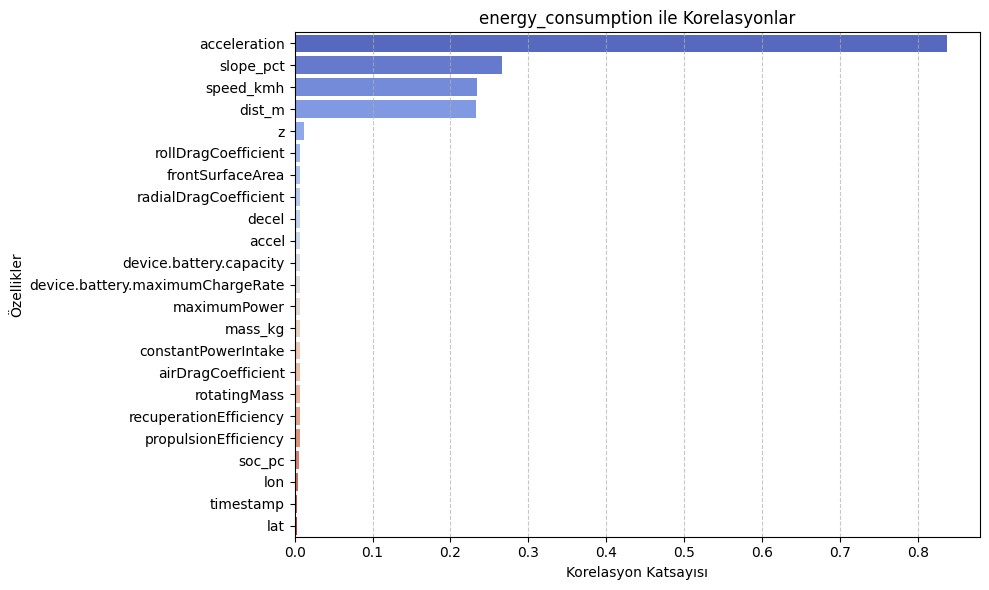

Energy Consumption ile Korelasyonlar (Yüksekten düşüğe):

acceleration                        0.837663
slope_pct                           0.265546
speed_kmh                           0.233642
dist_m                              0.232822
z                                   0.011874
rollDragCoefficient                 0.006899
frontSurfaceArea                    0.006743
radialDragCoefficient               0.006743
decel                               0.006734
accel                               0.006734
device.battery.capacity             0.006728
device.battery.maximumChargeRate    0.006728
maximumPower                        0.006728
mass_kg                             0.006727
constantPowerIntake                 0.006724
airDragCoefficient                  0.006716
rotatingMass                        0.006689
recuperationEfficiency              0.006629
propulsionEfficiency                0.006577
soc_pc                              0.006179
lon                                 0.0048

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasyonları hesapla
correlations = df.corr(numeric_only=True)["energy_consumption"].drop("energy_consumption")

# Mutlak değere göre büyükten küçüğe sırala
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Barplot olarak görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette="coolwarm")
plt.title("energy_consumption ile Korelasyonlar")
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Özellikler")
plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Sayısal çıktıyı da yazdır
print("Energy Consumption ile Korelasyonlar (Yüksekten düşüğe):\n")
print(correlations_sorted)


ORTAK Feature Engineering Blok (Tüm Modeller için)

In [10]:
# slope_pct sınırları → ±50% üstü/altı fiziksel olarak anlamlı değil
df = df[(df["slope_pct"] < 50) & (df["slope_pct"] > -50)]
# 3. Eksik slope_pct → 0 (eğim verisi yoksa "düz" kabul edilir)
df["slope_pct"] = df["slope_pct"].fillna(0)

In [11]:
# Aykırı değer temizliği - energy_consumption
# Aşırı negatif: Rejenerasyon dışında hata olabilir
df.loc[df["energy_consumption"] < -100, "energy_consumption"] = np.nan


# Diğer değişkenler (acceleration, slope_pct, z, speed_kmh, dist_m, soc_pc) için aykırılık müdahalesi yapılmaz
# slope_pct ve dist_m zaten önceki adımlarda işlenmişti


İVME ÇOK ÖNEMLİ

In [12]:
# ivme ayrımı
# bu sayede enerji tüketimi (hızlanırken) ve rejeneratif enerji kazanımı (yavaşlarken) ayrı ayrı analiz edilebilir.
# verimlilik hesaplarını ve optimizasyonu daha doğru yapmayı sağlar
# Pozitif ivme (gaz) tüketimi artırır; negatif ivme (fren/iniş) rejenerasyon sağlayabilir. Tek sütun olsa bu fark kaybolabilirdi
df["acc_pos"] = df["acceleration"].clip(lower=0)
df["acc_neg"] = (-df["acceleration"]).clip(lower=0)

# Hız: m/s ve v^2
df["speed_ms"] = df["speed_kmh"] / 3.6
df["v2"] = df["speed_ms"] ** 2 # Hızın kareli hali (kinetik enerjiyle ilişkili) modeller için anlamlı yeni bir değişkendir

# Aerodinamik: Cd * A
df["CdA"] = df["airDragCoefficient"] * df["frontSurfaceArea"] # bu ikini birleştirip vermek daha mantıklı

In [13]:
# sayısal olması gereken sütunları sayıya çevir
# grab_col_names çıktısında rollDragCoefficient num_but_cat görünüyor (unique<10) ama bu bir sayısal katsayı; kategorik kodlanmamalı.

#vehicle_id yüksek kardinal kimlik → özellik olarak verilmez, sadece gruplama için kullanılır.

NUM_SHOULD_BE = [
    "timestamp","speed_kmh","lat","lon","z","acceleration","mass_kg","soc_pc",
    "energy_consumption","accel","decel","radialDragCoefficient","device.battery.capacity",
    "device.battery.maximumChargeRate","recuperationEfficiency","airDragCoefficient",
    "rollDragCoefficient","frontSurfaceArea","constantPowerIntake","rotatingMass",
    "propulsionEfficiency","maximumPower","dist_m","slope_pct"
]
for c in NUM_SHOULD_BE:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# id sütunu dursun ama X'e girmeyecek
if "vehicle_id" not in df.columns:
    df["vehicle_id"] = "veh0"

In [14]:
df.head()

,timestamp,vehicle_id,speed_kmh,lat,lon,z,acceleration,mass_kg,soc_pc,energy_consumption,...,rollDragCoefficient,rotatingMass,radialDragCoefficient,dist_m,slope_pct,acc_pos,acc_neg,speed_ms,v2,CdA
1,3,veh1,13.82400,39.751061,30.502096,825.898326,3.8400,1916.0,91.736124,4.93,...,0.01,38.0,0.445,3.842938,1.521728,3.84,0.0000,3.8400,14.745600,0.8281
2,4,veh1,27.64800,39.750998,30.502060,826.015284,3.8400,1916.0,91.721126,14.04,...,0.01,38.0,0.445,7.685875,1.521728,3.84,0.0000,7.6800,58.982400,0.8281
3,5,veh1,41.47200,39.750903,30.502007,826.190722,3.8400,1916.0,91.696298,23.26,...,0.01,38.0,0.445,11.528813,1.521728,3.84,0.0000,11.5200,132.710400,0.8281
4,6,veh1,24.68952,39.750850,30.501967,826.246155,-4.6618,1916.0,91.718661,-20.94,...,0.01,38.0,0.445,6.773789,0.818349,0.00,4.6618,6.8582,47.034907,0.8281
5,7,veh1,24.68952,39.750851,30.501893,826.229195,0.0000,1916.0,91.717924,0.69,...,0.01,38.0,0.445,6.395591,-0.265172,0.00,-0.0000,6.8582,47.034907,0.8281


In [15]:
df.shape

(360190, 30)

In [16]:
feature_cols = [
    "v2",                      # hızın karesi (kinetik enerji ile ilişkili)
    "acc_pos", "acc_neg",       # hızlanma / frenleme ,  enerji tüketimi & rejenerasyon
    "slope_pct",                # yol eğimi
    "mass_kg", "CdA", "rollDragCoefficient",   # araç fiziği
    "propulsionEfficiency", "recuperationEfficiency",  # # enerji verimliliği
    "maximumPower"      # motorun max gücü
]

feature_cols = [c for c in feature_cols if c in df.columns]
X = df[feature_cols].copy()
y = df["energy_consumption"].copy()
print("X shape:", X.shape)


X shape: (360190, 10)


In [17]:
if "vehicle_id" not in df.columns:
    df["vehicle_id"] = "veh0"
groups = df["vehicle_id"]


In [18]:
from sklearn.model_selection import GroupShuffleSplit

def group_split(X, y, groups, test_size=0.15, val_size=0.15, rs=42):
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=rs)
    i_tr, i_te = next(gss.split(X, y, groups))
    gss2 = GroupShuffleSplit(n_splits=1, test_size=val_size/(1-test_size), random_state=rs)
    j_tr, j_val = next(gss2.split(X.iloc[i_tr], y.iloc[i_tr], groups.iloc[i_tr]))
    tr_idx = X.iloc[i_tr].index[j_tr]; val_idx = X.iloc[i_tr].index[j_val]; te_idx = X.index[i_te]
    return tr_idx, val_idx, te_idx

train_idx, val_idx, test_idx = group_split(X, y, groups)
X_train, y_train = X.loc[train_idx], y.loc[train_idx]
X_val,   y_val   = X.loc[val_idx],   y.loc[val_idx]
X_test,  y_test  = X.loc[test_idx],  y.loc[test_idx]


In [19]:
split = pd.Series(index=X.index, data="train")
split.loc[val_idx] = "val"
split.loc[test_idx] = "test"

# Güvenlik
tmp = df.loc[split.index, ["vehicle_id"]].assign(split=split.values)
assert (tmp.groupby("vehicle_id")["split"].nunique() == 1).all(), "Aynı vehicle_id birden fazla split'te!"

# Split özet
veh_to_split = tmp.groupby("vehicle_id")["split"].first().reset_index()
print(veh_to_split["split"].value_counts())


split
train    210
test      45
val       45
Name: count, dtype: int64


In [20]:
# --- vehicle_id -> split eşlemesi ve listeler ---

split = pd.Series(index=X.index, data="train")
split.loc[val_idx] = "val"
split.loc[test_idx] = "test"

# 1) Her vehicle_id tek bir split'te mi? (güvenlik kontrolü)
tmp = df.loc[split.index, ["vehicle_id"]].assign(split=split.values)
assert (tmp.groupby("vehicle_id")["split"].nunique() == 1).all(), "Aynı vehicle_id birden fazla split'te!"

# 2) vehicle_id -> split haritası
veh_to_split = tmp.groupby("vehicle_id")["split"].first().reset_index()
print(veh_to_split["split"].value_counts(), "\n")
print(veh_to_split.head())

# 3) Listeler (train/val/test) ve kısa özet
veh_train = veh_to_split.loc[veh_to_split["split"]=="train","vehicle_id"].tolist()
veh_val   = veh_to_split.loc[veh_to_split["split"]=="val","vehicle_id"].tolist()
veh_test  = veh_to_split.loc[veh_to_split["split"]=="test","vehicle_id"].tolist()

print(f"\n#vehicle_id -> train:{len(veh_train)}, val:{len(veh_val)}, test:{len(veh_test)}")
print("train örnek:", veh_train)
print("val   örnek:", veh_val)
print("test  örnek:", veh_test)

# 4) Araç başına satır sayısı (bilgi amaçlı)
rows_per_vehicle = tmp.groupby(["vehicle_id","split"]).size().reset_index(name="rows")
print("\nAraç başına satır (ilk 10):")
print(rows_per_vehicle.head(10))


rows_per_vehicle.to_csv("/content/rows_per_vehicle.csv", index=False)
print("\nKaydedildi:")
print("/content/rows_per_vehicle.csv")


split
train    210
test      45
val       45
Name: count, dtype: int64 

  vehicle_id  split
0       veh1  train
1      veh10  train
2     veh100  train
3     veh101  train
4     veh102  train

#vehicle_id -> train:210, val:45, test:45
train örnek: ['veh1', 'veh10', 'veh100', 'veh101', 'veh102', 'veh104', 'veh108', 'veh109', 'veh111', 'veh112', 'veh113', 'veh115', 'veh117', 'veh118', 'veh121', 'veh122', 'veh123', 'veh124', 'veh127', 'veh128', 'veh13', 'veh130', 'veh132', 'veh133', 'veh135', 'veh136', 'veh138', 'veh139', 'veh141', 'veh142', 'veh143', 'veh144', 'veh145', 'veh146', 'veh147', 'veh149', 'veh15', 'veh151', 'veh152', 'veh154', 'veh155', 'veh156', 'veh157', 'veh158', 'veh159', 'veh16', 'veh160', 'veh161', 'veh162', 'veh163', 'veh164', 'veh166', 'veh167', 'veh170', 'veh171', 'veh172', 'veh173', 'veh175', 'veh176', 'veh177', 'veh178', 'veh179', 'veh18', 'veh182', 'veh184', 'veh185', 'veh187', 'veh188', 'veh189', 'veh19', 'veh190', 'veh191', 'veh194', 'veh195', 'veh196', 'veh197'

G5: En az 3 farklı model ile enerji tüketimi tahmini

Hızlı ve basit bir tahmin modeliyle başlayalım. Performans ölçelim.

Linear/NN (ölçekleme gerektirir, kolinearlikten kaçın)
“sade & fiziksel” set:

Tree/Boosting (ölçekleme gerekmez, kolinearite sorun etmez)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- NaN'leri temizle ---
train_data = pd.concat([X_train, y_train], axis=1).dropna()
val_data   = pd.concat([X_val, y_val], axis=1).dropna()
test_data  = pd.concat([X_test, y_test], axis=1).dropna()

# --- X ve y'yi ayır ---
X_train = train_data.drop("energy_consumption", axis=1)
y_train = train_data["energy_consumption"]
X_val   = val_data.drop("energy_consumption", axis=1)
y_val   = val_data["energy_consumption"]
X_test  = test_data.drop("energy_consumption", axis=1)
y_test  = test_data["energy_consumption"]

# --- StandardScaler ile ölçekleme ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [22]:
X_train.columns

Index(['v2', 'acc_pos', 'acc_neg', 'slope_pct', 'mass_kg', 'CdA',
       'rollDragCoefficient', 'propulsionEfficiency', 'recuperationEfficiency',
       'maximumPower'],
      dtype='object')

In [23]:
# Linear Regression modeli
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Tahminler
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred   = lr_model.predict(X_val_scaled)
y_test_pred  = lr_model.predict(X_test_scaled)


In [24]:
def evaluate_model(y_true, y_pred, name="Set"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Test")


Train -> MAE: 3.83 | RMSE: 6.29 | R²: 0.799
Validation -> MAE: 3.86 | RMSE: 6.32 | R²: 0.788
Test -> MAE: 4.25 | RMSE: 6.93 | R²: 0.797


Linear Regression Modeli – Feature Importance Analizi

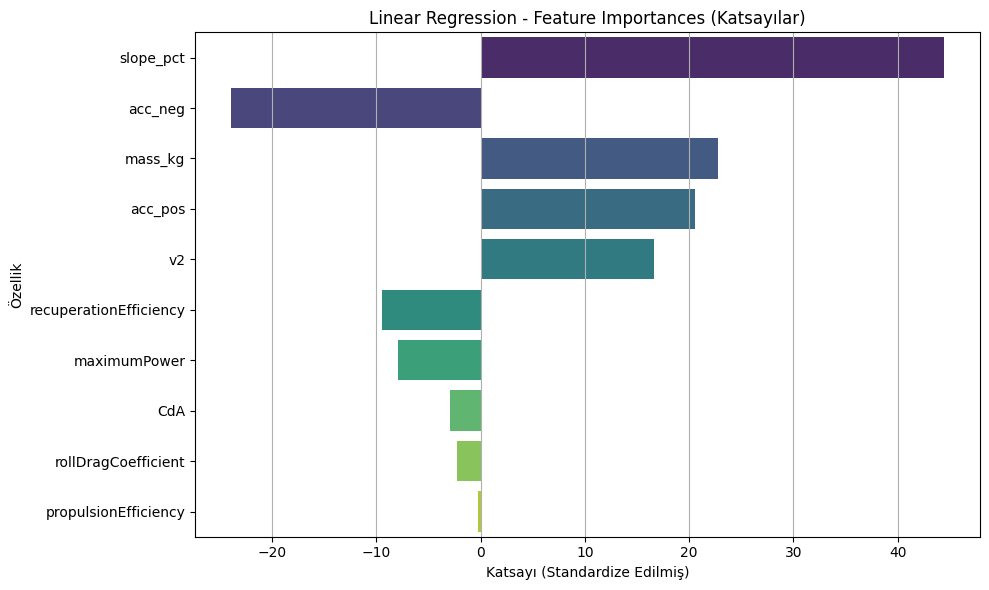

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellik isimleri ve katsayıları
coefs = pd.Series(lr_model.coef_, index=X_train.columns)

# Mutlak değere göre sıralama (en etkili başta)
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs_sorted.values, y=coefs_sorted.index, palette="viridis")

plt.title("Linear Regression - Feature Importances (Katsayılar)")
plt.xlabel("Katsayı (Standardize Edilmiş)")
plt.ylabel("Özellik")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


RnadomForest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Standart ağaç modeller için ölçekleme gerekmez, bu nedenle doğrudan NaN temizliği yeterlidir.

# NaN'leri temizle
train_data_rf = pd.concat([X_train, y_train], axis=1).dropna()
val_data_rf   = pd.concat([X_val, y_val], axis=1).dropna()
test_data_rf  = pd.concat([X_test, y_test], axis=1).dropna()

# X ve y ayır
X_train_rf = train_data_rf.drop("energy_consumption", axis=1)
y_train_rf = train_data_rf["energy_consumption"]

X_val_rf   = val_data_rf.drop("energy_consumption", axis=1)
y_val_rf   = val_data_rf["energy_consumption"]

X_test_rf  = test_data_rf.drop("energy_consumption", axis=1)
y_test_rf  = test_data_rf["energy_consumption"]


In [25]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Parametre aralığı belirleme (dar başlayabiliriz, sonra genişletilir)
param_grid = {
    "n_estimators": [100, 200],             # Ağaç sayısı
    "max_depth": [None, 10, 20, 30],         # Maksimum derinlik
    "min_samples_split": [2, 5, 10],         # Bir düğümü ayırmak için min örnek
    "min_samples_leaf": [1, 2, 4],           # Bir yaprakta bulunması gereken min örnek
    "max_features": ["auto", "sqrt", "log2"] # Her split'te göz önüne alınacak max feature
}

# Modeli oluştur
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV tanımı
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',  # Alternatif: 'neg_mean_squared_error'
    verbose=2,
    n_jobs=-1
)

# Eğitimi başlat
grid_search.fit(X_train, y_train)

# En iyi sonuçlar
print("En iyi parametreler:")
print(grid_search.best_params_)

print("\nEn iyi skor (neg MAE):")
print(grid_search.best_score_)
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Parametre aralığı belirleme (dar başlayabiliriz, sonra genişletilir)\nparam_grid = {\n    "n_estimators": [100, 200],             # Ağaç sayısı\n    "max_depth": [None, 10, 20, 30],         # Maksimum derinlik\n    "min_samples_split": [2, 5, 10],         # Bir düğümü ayırmak için min örnek\n    "min_samples_leaf": [1, 2, 4],           # Bir yaprakta bulunması gereken min örnek\n    "max_features": ["auto", "sqrt", "log2"] # Her split\'te göz önüne alınacak max feature\n}\n\n# Modeli oluştur\nrf = RandomForestRegressor(random_state=42, n_jobs=-1)\n\n# GridSearchCV tanımı\ngrid_search = GridSearchCV(\n    estimator=rf,\n    param_grid=param_grid,\n    cv=3,\n    scoring=\'neg_mean_absolute_error\',  # Alternatif: \'neg_mean_squared_error\'\n    verbose=2,\n    n_jobs=-1\n)\n\n# Eğitimi başlat\ngrid_search.fit(X_train, y_train)\n\n# En iyi sonuçlar\nprint("En iyi parametreler:")\n

In [27]:
from sklearn.ensemble import RandomForestRegressor

best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'random_state': 42,
    'n_jobs': -1
}

rf_final = RandomForestRegressor(**best_params)
rf_final.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=42)

In [28]:
y_train_pred = rf_final.predict(X_train_rf)
y_val_pred   = rf_final.predict(X_val_rf)
y_test_pred  = rf_final.predict(X_test_rf)

evaluate_model(y_train_rf, y_train_pred, "Train")
evaluate_model(y_val_rf, y_val_pred, "Validation")
evaluate_model(y_test_rf, y_test_pred, "Test")


Train -> MAE: 0.75 | RMSE: 1.55 | R²: 0.988
Validation -> MAE: 1.27 | RMSE: 2.81 | R²: 0.958
Test -> MAE: 1.31 | RMSE: 2.78 | R²: 0.967


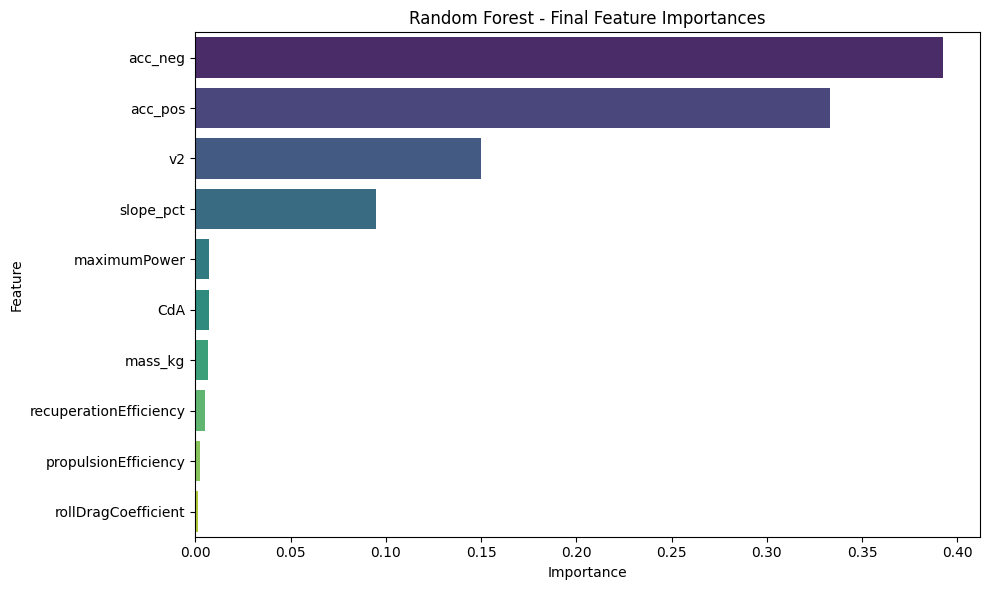

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = rf_final.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Random Forest - Final Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Yapay Sinir Ağı

Hız, eğim, ivme gibi değişkenlerin enerji tüketimi üzerindeki etkileri doğrusal olmayabilir.

Sinir ağı, bu karmaşık (non-linear) ilişkileri öğrenme konusunda çok güçlüdür.